In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import numpy as np
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

2023-08-29 18:57:55.029823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
adata = sc.read_h5ad('../DataSubmission/')
#adata_tumor_sc.X = adata_tumor_sc.layers['smooth']

In [3]:
adata_clusters = adata[adata.obs.CombinedNameMergeImmune.isin(
        [
            'GW-like 1','GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6','GW-like 7', 'GW-like 8',
        ]
    )
]
adata_clusters.raw = adata_clusters
#OPC = OPC[OPC.X.sum(axis=1) > 20]

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 37 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'k', 'l', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 20, 21, 22, 23, 24, 25, 26, 27, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 59, 72, 76, 78, 79]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 37 glyphs 

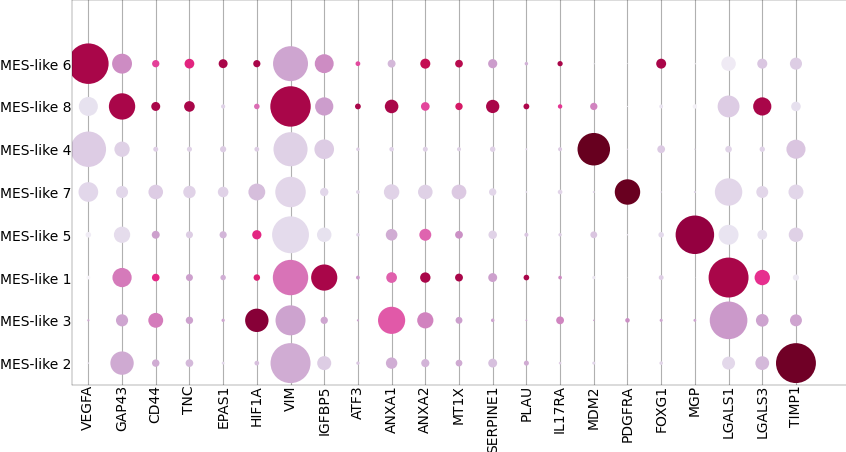

In [8]:
row_order =[ 
    'GW-like 2', 'GW-like 3', 'GW-like 1','GW-like 5','GW-like 7','GW-like 4', 'GW-like 8', 'GW-like 6',
       ]

col_order = [
    'VEGFA', 
    'GAP43','CD44','TNC',
    'EPAS1','HIF1A','VIM','IGFBP5', 'ATF3','ANXA1','ANXA2','MT1X',
    'SERPINE1','PLAU','IL17RA',
    
    'MDM2','PDGFRA','FOXG1',
    
    'MGP',
    
    'LGALS1','LGALS3', 
    'TIMP1',
]


markers = col_order#markers_preOPC + markers_OPC + markers_Ast + markers_RG  +markers_GW + markers_NPC + markers_GBL + markers_FB
     
df =sp.pl.dotplot_bgval(
    adata_clusters,
    col_order,
    cluster_key='CombinedNameMergeImmune',
    cmap='PuRd',
    min_cells=250,
    bgval=1,
    normalize_totals=False,
    minmax=True,
    size_factor=2500,
    figsize=(10,5),
    metric='correlation',
    row_order=row_order,
    col_order= col_order,
    ytick_rotation=0,
    reverse_rows=False,
    reverse_cols=False,
    save=True,
    savepath='figures/dotplotGW.pdf'
)